In [1]:
import os
os.chdir('../')

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import contextily as cx

## EDA for GADM_0

In [3]:
gadm_0_v = pd.read_csv("combined_dataset/GADM_0_variables.csv")
gadm_0_geo = gpd.read_file("combined_dataset/GADM_0_geometries.gpkg")
gadm_0_geo = gadm_0_geo.to_crs('4326')
gadm_1_v = pd.read_csv("combined_dataset/GADM_1_variables.csv")
gadm_1_geo = gpd.read_file("combined_dataset/GADM_1_geometries.gpkg")
gadm_1_geo = gadm_1_geo.to_crs('4326')

/tmp/ipykernel_56212/4067096438.py:4: DtypeWarning: Columns (1639) have mixed types. Specify dtype option on import or set low_memory=False.
  gadm_1_v = pd.read_csv("combined_dataset/GADM_1_variables.csv")


### Countries available in GADM_0.gpkg (48)
['Senegal',
 'Ghana',
 'Angola',
 'Benin',
 'Cameroon',
 'Republic of the Congo',
 'Comoros',
 'Cabo Verde',
 'Algeria',
 'Djibouti',
 'Ethiopia',
 'Kenya',
 'Madagascar',
 'Malawi',
 'Zimbabwe',
 'Zambia',
 'South Africa',
 'Uganda',
 'Tanzania',
 'Tunisia',
 'Togo',
 'Chad',
 'Swaziland',
 'São Tomé and Príncipe',
 'Sierra Leone',
 'Rwanda',
 'Nigeria',
 'Niger',
 'Mauritius',
 'Mauritania',
 'Mozambique',
 'Mali',
 'Morocco',
 'Lesotho',
 'Libya',
 'Liberia',
 'Equatorial Guinea',
 'Guinea-Bissau',
 'Gambia',
 'Guinea',
 'Gabon',
 'Egypt',
 'Democratic Republic of the Congo',
 "Côte d'Ivoire",
 'Central African Republic',
 'Botswana',
 'Burkina Faso',
 'Burundi']

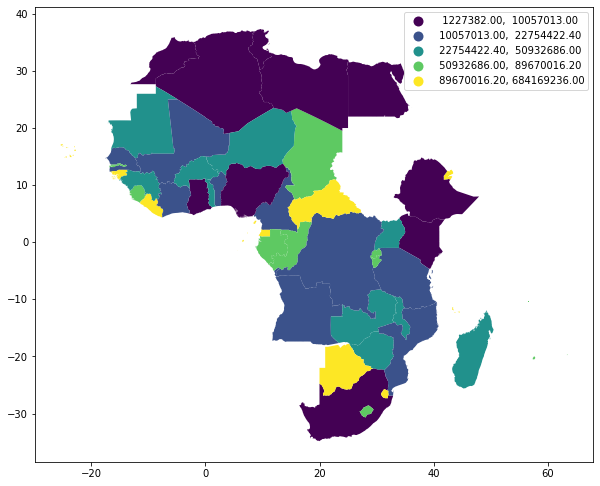

In [27]:
gadm_0.plot(figsize=(10,10),column='SCI',legend=True, scheme='quantiles')
plt.show()

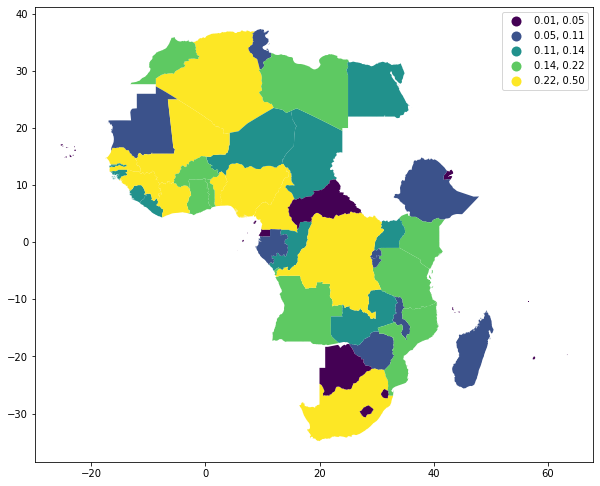

In [25]:
gadm_0.plot(figsize=(10,10),column='LMIC_interconnection_index',legend=True,scheme='quantiles')
plt.show()

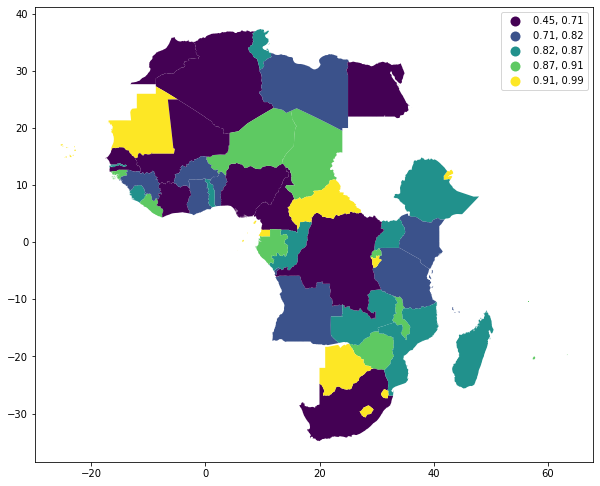

In [28]:
gadm_0.plot(figsize=(10,10),column='Intraconnection_index',legend=True,scheme='quantiles')
plt.show()

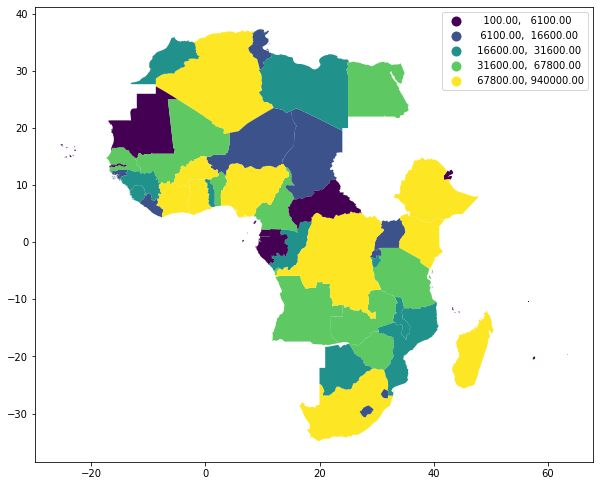

In [30]:
gadm_0.plot(figsize=(10,10),column='2G_Network_age_13_plus_male',legend=True,scheme='quantiles')
plt.show()

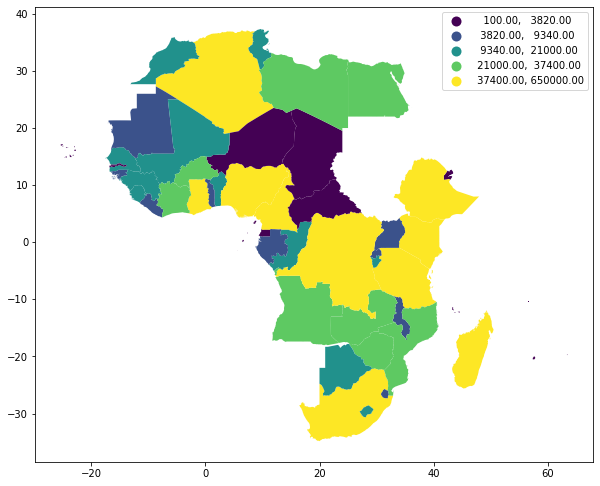

In [31]:
gadm_0.plot(figsize=(10,10),column='2G_Network_age_13_plus_female',legend=True,scheme='quantiles')
plt.show()

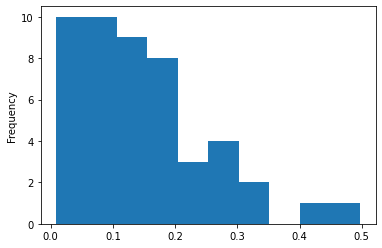

In [8]:
gadm_0['LMIC_interconnection_index'].plot.hist()
plt.show()

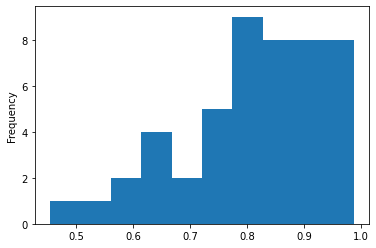

In [10]:
gadm_0['Intraconnection_index'].plot.hist()
plt.show()

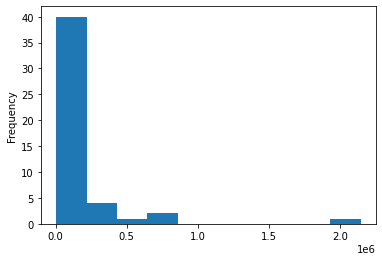

In [11]:
gadm_0['Std_SCI_without_Self'].plot.hist()
plt.show()

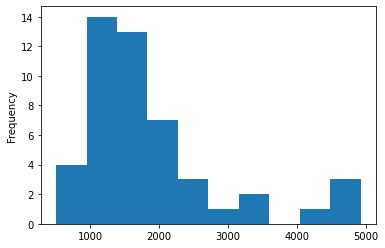

In [12]:
gadm_0['Median_SCI_without_Self'].plot.hist()
plt.show()

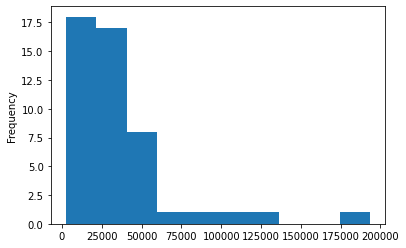

In [13]:
gadm_0['Mean_SCI_without_Self'].plot.hist()
plt.show()

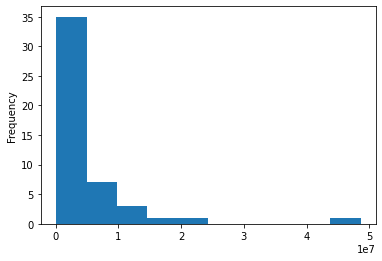

In [14]:
gadm_0['Std_SCI_with_Self'].plot.hist()
plt.show()

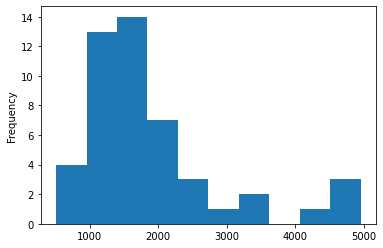

In [15]:
gadm_0['Median_SCI_with_Self'].plot.hist()
plt.show()

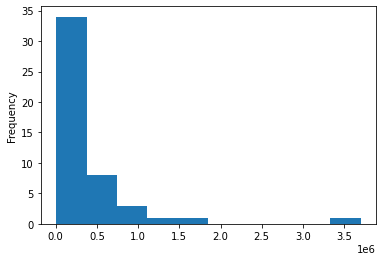

In [16]:
gadm_0['Mean_SCI_with_Self'].plot.hist()
plt.show()

## EDA for GADM_1

In [4]:
gadm_1_geo.head()

,GID_1,geometry
0,SEN1,"MULTIPOLYGON (((-17.46764 14.64874, -17.46764 ..."
1,SEN2,"MULTIPOLYGON (((-16.04326 14.55500, -16.04513 ..."
2,SEN3,"MULTIPOLYGON (((-16.65347 13.64736, -16.65347 ..."
3,SEN4,"POLYGON ((-15.39492 13.75729, -15.39724 13.754..."
4,SEN5,"POLYGON ((-15.99889 13.59169, -15.99910 13.591..."


In [5]:
gadm_1_v.head()

,Unnamed: 0,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,...,Std_SCI_without_Self,Intraconnection_index,LMIC_interconnection_index,Mean_dist_to_SCI,Median_dist_to_SCI,Std_dist_to_SCI,Total_dist,Local_sum_SCI,Local_mean_SCI,Local_std_SCI
0,0,SEN1,SEN,Senegal,Dakar,Cap Vert|Dacar,NaN,Région,Region,1,...,9441.361664,0.075277,0.830288,39.481249,40.698162,18.594985,27873.761450,3308263,94521.800000,1.260630e+05
1,1,SEN2,SEN,Senegal,Diourbel,NaN,NaN,Région,Region,3,...,7892.321344,0.468664,0.476091,38.510812,39.565828,18.528972,27188.632936,5146355,147038.714286,4.830321e+05
2,2,SEN3,SEN,Senegal,Fatick,NaN,NaN,Région,Region,9,...,9314.991223,0.731596,0.248352,38.588800,39.780994,18.481202,27243.692833,13619863,389138.942857,1.823593e+06
3,3,SEN4,SEN,Senegal,Kaffrine,NaN,NaN,Région,Region,12,...,10498.993410,0.707527,0.277654,37.636368,38.643405,18.374261,26571.276106,13693714,391248.971429,1.989001e+06
4,4,SEN5,SEN,Senegal,Kaolack,NaN,NaN,Région,Region,6,...,10033.398311,0.849674,0.141588,38.208950,39.382937,18.427104,26975.518544,27301064,780030.400000,4.097930e+06


## Countries available in GADM_1.gpkg (46)

['Senegal',
 'Ghana',
 'Angola',
 'Benin',
 'Cameroon',
 'Republic of the Congo',
 'Algeria',
 'Ethiopia',
 'Kenya',
 'Madagascar',
 'Malawi',
 'Zimbabwe',
 'Zambia',
 'South Africa',
 'Uganda',
 'Tanzania',
 'Tunisia',
 'Togo',
 'Chad',
 'Swaziland',
 'Sierra Leone',
 'Rwanda',
 'Nigeria',
 'Niger',
 'Namibia',
 'Mauritius',
 'Mauritania',
 'Mozambique',
 'Mali',
 'Morocco',
 'Lesotho',
 'Libya',
 'Liberia',
 'Equatorial Guinea',
 'Guinea-Bissau',
 'Gambia',
 'Guinea',
 'Gabon',
 'Eritrea',
 'Egypt',
 'Democratic Republic of the Congo',
 "Côte d'Ivoire",
 'Central African Republic',
 'Botswana',
 'Burkina Faso',
 'Burundi']

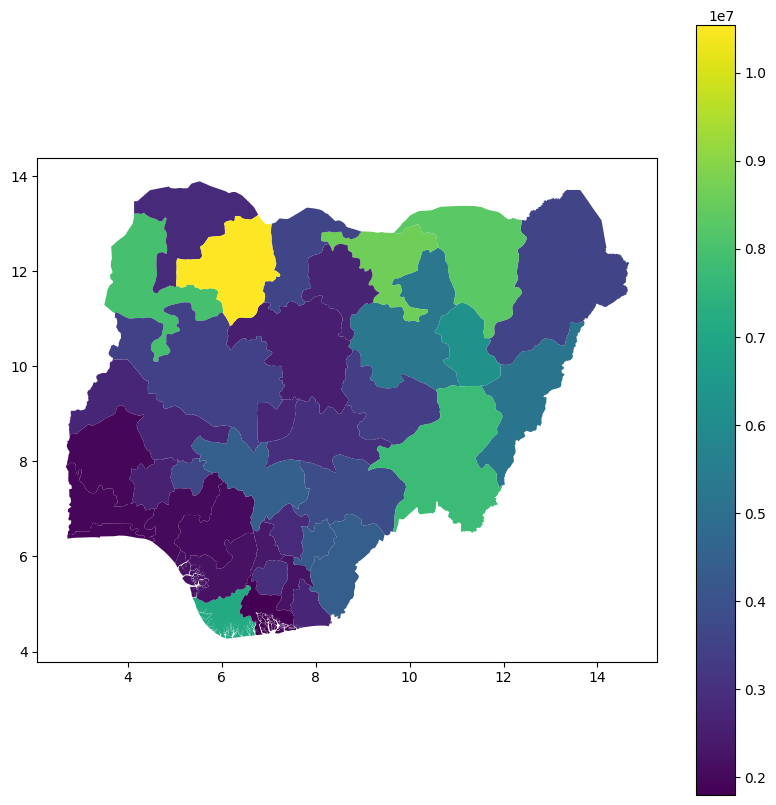

In [13]:
gadm_1 = gadm_1_v.merge(gadm_1_geo, on='GID_1', how='inner')
gadm_1 = gpd.GeoDataFrame(gadm_1)
gadm_1 = gadm_1.to_crs("4326")
gadm_1[gadm_1['GID_0']=='NGA'][['SCI','geometry']].plot(figsize=(10,10),column='SCI',legend=True)
plt.show()

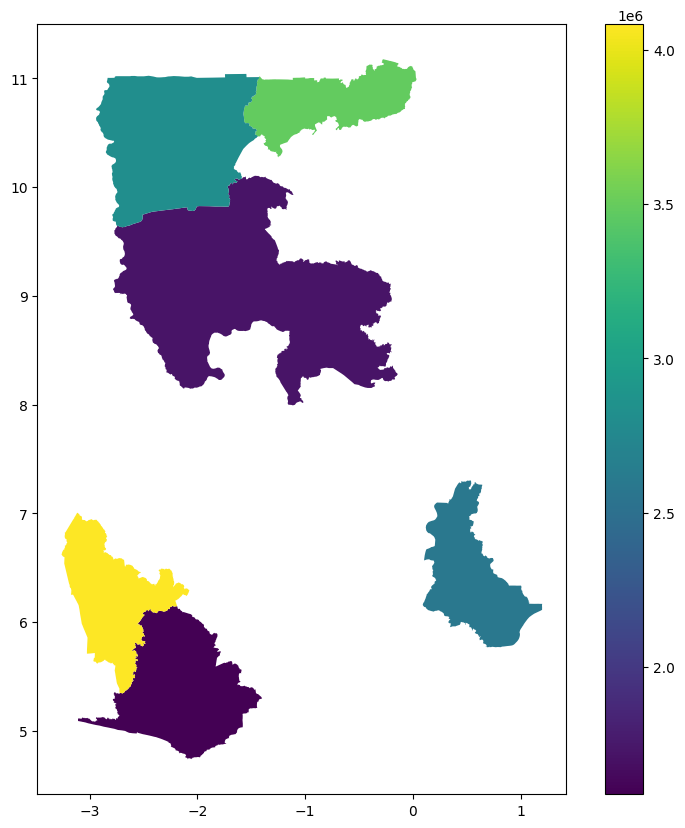

In [15]:
gadm_1[gadm_1['COUNTRY']=="Ghana"].plot(figsize=(10,10),column='Local_sum_SCI',legend=True)
plt.show()

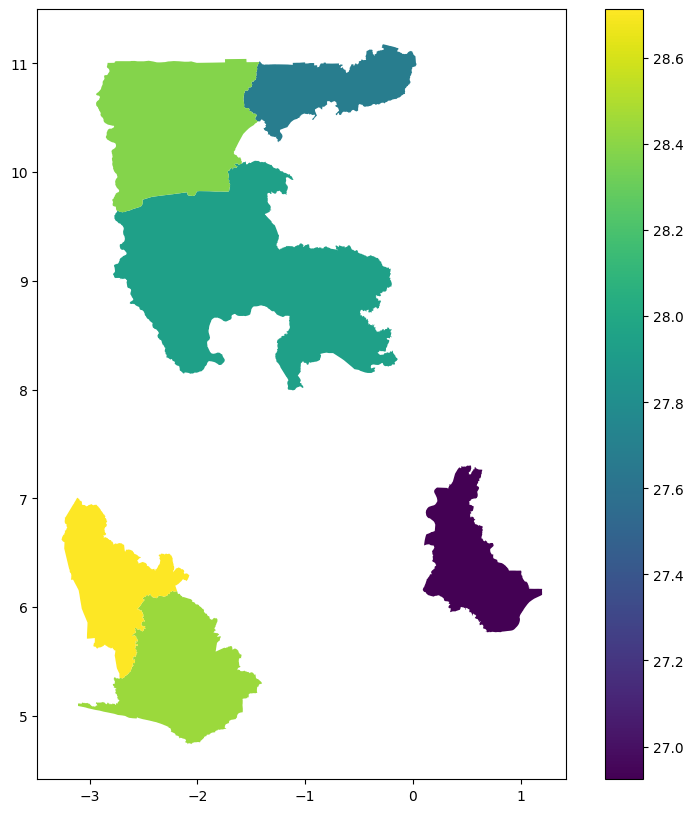

In [16]:
gadm_1[gadm_1['COUNTRY']=="Ghana"].plot(figsize=(10,10),column='Mean_dist_to_SCI',legend=True)
plt.show()

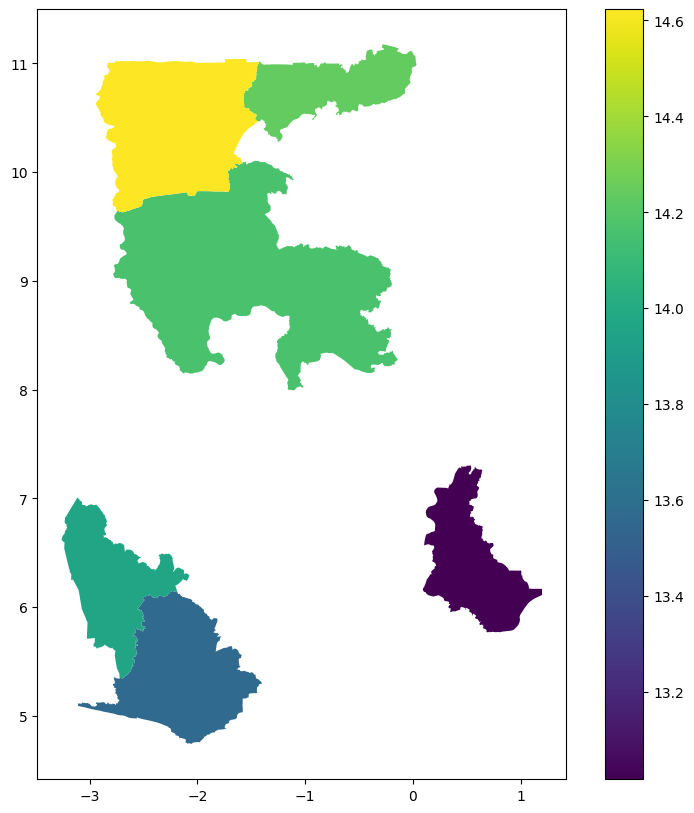

In [17]:
gadm_1[gadm_1['COUNTRY']=="Ghana"].plot(figsize=(10,10),column='Std_dist_to_SCI',legend=True)
plt.show()